# Synopsis

This code generates the g2 (ROI2) and tau vs. Q figure (water) for the manuscript

## Initialize

In [1]:

import numpy as np
from numpy import sqrt, sin, cos, pi, exp
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import h5py  
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from xpcs_viewer import XpcsFile as xf


## Read data

In [2]:

fn_path = '../Reduced_Data/'

Water = xf('J058_Water_XPCS_Trim.hdf', cwd = fn_path)
NaCl = xf('L067_NaCl_XPCS_Trim.hdf', cwd = fn_path)
NH4 = xf('M071_NH4_XPCS_Trim.hdf', cwd = fn_path)


## Fit g2 for water data

In [3]:

contrast = 0.14
exp_arg = 1

LB_list_g2 = [contrast, 1e-6, exp_arg, 0.95]
UB_list_g2 = [contrast, 1, exp_arg, 1.05]

tauq_power = -2
LB_list_tauQ = [1e-12, tauq_power]
UB_list_tauQ = [1e-3, tauq_power]

_ = Water.fit_g2(q_range=[0, 0.01],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
_ = Water.fit_tauq(q_range=[0, 0.01], bounds=[LB_list_tauQ, UB_list_tauQ], fit_flag=[True, False])
tauq_fit_val_Water = _["tauq_fit_val"]
tauq_fit_line_Water = _["tauq_fit_line"]
tauq_q_Water = _["tauq_q"]
tauq_tau_Water = _["tauq_tau"]
tauq_tau_err_Water = _["tauq_tau_err"]

_ = NaCl.fit_g2(q_range=[0, 0.01],t_range=[1e-8, 1e1], bounds=[LB_list_g2, UB_list_g2],
    fit_flag=[False, True, False, True])
_ = NaCl.fit_tauq(q_range=[0, 0.01], bounds=[LB_list_tauQ, UB_list_tauQ], fit_flag=[True, False])
tauq_fit_val_NaCl = _["tauq_fit_val"]
tauq_fit_line_NaCl = _["tauq_fit_line"]
tauq_q_NaCl = _["tauq_q"]
tauq_tau_NaCl = _["tauq_tau"]
tauq_tau_err_NaCl = _["tauq_tau_err"]

_ = NH4.fit_g2(q_range=[0, 0.01],t_range=[1e-8, 1e1], bounds=[LB_list_g2, UB_list_g2],
    fit_flag=[False, True, False, True])
_ = NH4.fit_tauq(q_range=[0, 0.01], bounds=[LB_list_tauQ, UB_list_tauQ], fit_flag=[True, False])
tauq_fit_val_NH4 = _["tauq_fit_val"]
tauq_fit_line_NH4 = _["tauq_fit_line"]
tauq_q_NH4 = _["tauq_q"]
tauq_tau_NH4 = _["tauq_tau"]
tauq_tau_err_NH4 = _["tauq_tau_err"]


## Fit tau vs. Q for NaCl and (NH$_4$)$_2$SO$_4$

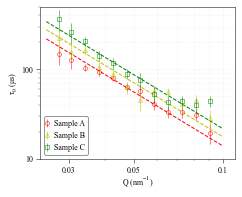

In [7]:

scale = 1
width = 3.5*scale
font_size = 8*scale
line_width = 0.5*scale
marker_size = 4*scale
tick_length_major = 4*scale
tick_length_minor = 2*scale

dim=1

###### Set up canvas ######
%matplotlib inline
plt.rcParams["font.family"] = "Times New Roman"

###### Plot ######
fig, ax = plt.subplots(1, 1, figsize=(width, 0.8*width))
ax.errorbar(tauq_q_Water,tauq_tau_Water,tauq_tau_err_Water,fmt='ro', linewidth=line_width,
            markeredgewidth=line_width, markersize=marker_size, markerfacecolor='none', label='Sample A')
ax.errorbar(tauq_q_NaCl,tauq_tau_NaCl,tauq_tau_err_NaCl,fmt='y^', linewidth=line_width,
            markeredgewidth=line_width, markersize=marker_size, markerfacecolor='none', label='Sample B')
ax.errorbar(tauq_q_NH4,tauq_tau_NH4,tauq_tau_err_NH4,fmt='gs', linewidth=line_width, 
            markeredgewidth=line_width, markersize=marker_size, markerfacecolor='none', label='Sample C')
ax.plot(tauq_fit_line_Water["fit_x"],tauq_fit_line_Water["fit_y"],'r--', linewidth=2*line_width)
ax.plot(tauq_fit_line_NaCl["fit_x"],tauq_fit_line_NaCl["fit_y"],'y--', linewidth=2*line_width)
ax.plot(tauq_fit_line_NH4["fit_x"],tauq_fit_line_NH4["fit_y"],'g--', linewidth=2*line_width)

###### Set axes ######
ax.tick_params('both', length=tick_length_major, width=line_width, which='major', labelsize=font_size)
ax.tick_params('both', length=tick_length_minor, width=0.5*line_width, which='minor', 
               labelleft=False, labelbottom=False)
ax.grid(color='k', linestyle=':', linewidth=line_width, alpha=0.1, which='both')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(line_width)

ax.set_xscale('log')
ax.set_xlim(2.4e-3, 1.1e-2)
ax.set_xticks([3e-3, 5e-3, 1e-2])
ax.set_xticklabels([0.03, 0.05, 0.1], fontsize=font_size)
ax.set_xlabel('Q (nm$\mathdefault{^{-1}}$)', fontsize=font_size, labelpad=0.05*font_size)

ax.set_yscale('log')
ax.set_ylim(1e-5, 5e-4)
ax.set_yticks([1e-5, 1e-4])
ax.set_yticklabels([10, 100], fontsize=font_size)
ax.set_ylabel('$\mathdefault{\u03C4_0}$ ($\mathdefault{\mu}$s)', 
              fontsize=font_size, labelpad=0.05*font_size)

###### Set legend ######
legend=ax.legend(fancybox=True, fontsize=font_size, loc=3)
legend.get_frame().set_edgecolor('k')
legend.get_frame().set_linewidth(line_width)

###### Save figure legend ######
plt.savefig('tauQ_all_sample.pdf', format='pdf', 
            facecolor='w', edgecolor='w', transparent=False, bbox_inches='tight')


## Calculate hydrodynamic radius
Boltzmann constant = $1.38\times10^{-23}$ m$^2\cdot$ kg $\cdot$ s$^{-2}\cdot$ K$^{-1}$   
T = 273.15 + 6 = 279.15 K   
$\eta$ = 1.472 $\times 10^{-3}$ Pa$\cdot$s

$D = kT\ /\ 6\pi \eta R$

In [8]:

k = 1.38e-23
T = 273.5 + 6
eta = 1.520e-3

diff_Water = 1/tauq_fit_val_Water[0,0]*1e-20
diff_NaCl = 1/tauq_fit_val_NaCl[0,0]*1e-20
diff_NH4 = 1/tauq_fit_val_NH4[0,0]*1e-20

Rh_Water = k*T/(6*3.14159*eta*diff_Water)
Rh_NaCl = k*T/(6*3.14159*eta*diff_NaCl)
Rh_NH4 = k*T/(6*3.14159*eta*diff_NH4)

Rh_err_ratio_Water = tauq_fit_val_Water[1,0]/tauq_fit_val_Water[0,0]
Rh_err_ratio_NaCl = tauq_fit_val_NaCl[1,0]/tauq_fit_val_NaCl[0,0]
Rh_err_ratio_NH4 = tauq_fit_val_NH4[1,0]/tauq_fit_val_NH4[0,0]

print(f'RH Water is {Rh_Water*1e9:4.2f} \u00B1 {Rh_Water*Rh_err_ratio_Water*1e9:4.2f} nm') 
print(f'RH NaCl is {Rh_NaCl*1e9:4.2f} \u00B1 {Rh_NaCl*Rh_err_ratio_NaCl*1e9:4.2f} nm')
print(f'RH NH4 is {Rh_NH4*1e9:4.2f} \u00B1 {Rh_NH4*Rh_err_ratio_NH4*1e9:4.2f} nm')
      

RH Water is 18.72 ± 0.74 nm
RH NaCl is 23.69 ± 1.63 nm
RH NH4 is 29.18 ± 1.49 nm
